In [1]:
import quanguru as qg

# QuanGuru uses sparse matrices by default, 
# but sparse matrices are not easily readable when we print them
# so, in below examples, we use .A to print them as arrays

# 0 - Hamiltonian of a single quantum system

This tutorial demonstrates how to describe the Hamiltonian of a quantum system in `QuanGuru`.

Let's start with a very simple Hamiltonian

$H = f\hat{O}$

Here, the *relevant* information are

- frequency : $f$, which is a float
- operator : $\hat{O}$ (we will omit the hat from the operator when they are clear from the context)
- dimension : of the operator, which is an integer 

In `QuanGuru`, we create a quantum system using the `QuantumSystem` object, which requires at least one of these information during instantiation.

`frequency` and `dimension` are simply numbers, and for the `operator`, we use the functions in `QuantumToolbox` `operators` module. However, any function (from any other library) that creates and returns the matrix representation of the desired operator can be used, because the `QuantumSystem` object just requires the function reference.

Let's give some concrete examples.

## 1 - Qubit

For a qubit:

- `dimension = 2` 
- `frequency = #` any number we want (say, $f=2$)
- `operator` can be any (Hermitian) operator we want, but it is usually the $\sigma_{z}$ operator (Pauli-z operator)

Then, the Hamiltonian would be 

$H = f*\sigma_{z} = 2\left[\begin{array}{ll}1 & 0 \\ 0 & -1\end{array}\right] = \left[\begin{array}{ll}2 & 0 \\ 0 & -2\end{array}\right]$

and we can create this system as below

In [2]:
qub = qg.QuantumSystem(dimension=2, frequency=2, operator=qg.sigmaz)

print(qub.totalHam.A)

[[ 2  0]
 [ 0 -2]]


Notice that the `operator` of the `QuantumSystem` is the function `qg.sigmaz` (from `QuantumToolbox`), and it does not have the parenthesis  `qg.sigmaz()`, which would invoke/call the functino to create the matrix form of the operator. Make sure to pass the function without the parenthesis. The `QuantumSystem` objects call these functions in the background to create the matrices.

## 2 - Larger spins

Qubit object is equivalent to a spin-1/2 system, and we can create any other spin system using the `J_{x/y/z}` operators from the `QuantumToolbox`.

Let's create a spin-1 system, which means

- `dimension = 3` 
- `frequency = #` any number we want (say, $f=2$)
- `operator` is usually the $J_{z}$ operator 

Then, the Hamiltonian would be 

$H = f*J_{z} = 2\left[\begin{array}{lll}1 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & -1\end{array}\right] = \left[\begin{array}{llll}2 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & -2\end{array}\right]$

In [3]:
spin1 = qg.QuantumSystem(dimension=3, frequency=2, operator=qg.Jz)

print(spin1.totalHam.A)

[[ 2.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0. -2.]]


## 3 - Harmonic oscillator

This is an infinite dimensional system, but we can use a truncated space by setting the dimension to a finite value (which should be large enough for your simulations, but its discussion is beyond this tutorial). For an Harmonic oscillator, we have

- `dimension = 5` (a small number so that printed matrix is readable)
- `frequency = #` any number we want (say, $f=2$)
- `operator` is usually the $a^{\dagger}a = n$ number operator


Then, the Hamiltonian would be 

$H = f*J_{z} = 2\left[\begin{array}{lllll}0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 2 & 0 & 0 \\ 0 & 0 & 0 & 3 & 0 \\ 0 & 0 & 0 & 0 & 4 \end{array}\right] = \left[\begin{array}{lllll}0 & 0 & 0 & 0 & 0 \\ 0 & 2 & 0 & 0 & 0 \\ 0 & 0 & 4 & 0 & 0 \\ 0 & 0 & 0 & 6 & 0 \\ 0 & 0 & 0 & 0 & 8 \end{array}\right]$

In [4]:
ho = qg.QuantumSystem(dimension=5, frequency=2, operator=qg.number)

print(ho.totalHam.A)

[[0 0 0 0 0]
 [0 2 0 0 0]
 [0 0 4 0 0]
 [0 0 0 6 0]
 [0 0 0 0 8]]


## Special classes for common system

The above systems are quite common.
Therefore, `QuanGuru` provides special classes for these systems, and these classes comes with default values for some of the above attributes:

- `Spin` class for spin systems, which also provides an attribute named `jValue` (for spin value) so that we can use spin number instead of dimension. It comes with the default `operator = qg.Jz`
- `Qubit` class for a qubit, and its a special case of `Spin` class with `dimension = 2` by default. This means that its operator is `qg.Jz` by default, not `qg.sigmaz`. This operator choice is discussed in later tutorials.
- `Cavity` class for harmonic-oscillator/cavity/resonator, and it defaults `operator = qg.number`


In [5]:
spin1_usingDimension = qg.Spin(dimension=3, frequency=2)
spin1_usingjValue = qg.Spin(jValue=1, frequency=2)

print(spin1_usingDimension.totalHam.A)
print(spin1_usingjValue.totalHam.A)

print(spin1_usingDimension.dimension, spin1_usingDimension.jValue)
print(spin1_usingjValue.dimension, spin1_usingjValue.jValue)

[[ 2.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0. -2.]]
[[ 2.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0. -2.]]
3 1.0
3 1.0


In [6]:
qb = qg.Qubit(frequency=2)

print(qb.totalHam.A)
print(qb.dimension, qb.jValue)

[[ 1.  0.]
 [ 0. -1.]]
2 0.5


In [7]:
cav = qg.Cavity(dimension=5, frequency=2)

print(cav.totalHam.A)

[[0 0 0 0 0]
 [0 2 0 0 0]
 [0 0 4 0 0]
 [0 0 0 6 0]
 [0 0 0 0 8]]


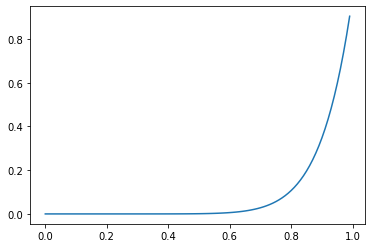

In [8]:
import matplotlib.pyplot as plt
plt.plot([i/100 for i in range(100)], [(i/100)**10 for i in range(100)])